## Exercise 2

In the `FiniteDifferences` notebook we considered the differential equation controlling heat flow which relates the rate of change in $T$, the temperature, to spatial gradients in the same quantity. 

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$
       
       
We ignored $H$ and solved a number of examples. 

At the end of the notebook we looked at the time-varying solution of the heat equation using an explicit finite difference approximation. Given all the trouble we went to setting this up, don't you think it would be a good idea to see if we can iterate until we reach the steady-state solution?

This is not very complicated to do so I would like you to try it __for the case where $\kappa$ is constant__.

You can copy and paste the cells from the `FiniteDifferences` here to get started.

## Hints

You have most of the code you need. The `np.gradient` function will still be useful ... in fact you really only have to put everything in a `for` loop and enforce the boundary conditions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#setting up the initial conditions
np.gradient

nx = 30
ny = 30
dx = 1.0
dy = 1.0
T = np.zeros((ny,nx))


k = 1

steps = 10000
#setting up the arrays to keep track of each itteration
time = np.zeros(steps)
time[0] = 0.0
arrayT = np.array((1,steps))
arrayT[0] = 0.0
arraysteady = np.array((1,30))
arraysteady[0] = 0.0
#steady state array to store each T itteration
SS = [T]
#timestep loop
for i in range(1, steps):
    # Initial conditions
    T[0,:] = 800.
    T[-1,:] = 500.
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = (dx*dy)/k
    time += dt
    
    T = T + dt*divT
    time[i] = time[i-1] + 1
    #store each iteration of T
    SS.append(T)
    #compare iterations of T
   
    comparison = SS[i] == SS[i-1]
    steadyarray = comparison.all()
    if steadyarray == True:
        print(i-1)
        break

2783


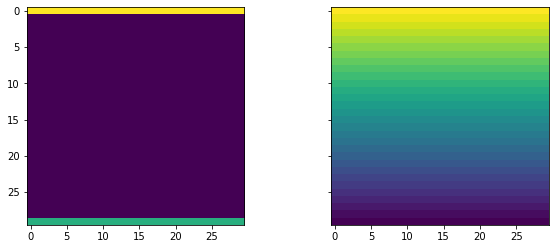

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(SS[0])
ax2.imshow(SS[i])


By comparing Tn and Tn-1 in the loop and by stoping the code when the differences are negligible, the apparent iteration that reaches thermal equilibrium is i = 2783. The equilibrium could be considered reached much earlier if you take small differences (1e-10 and smaller) to be negligible.

<font color='brick'>
First, you should enforce boundary conditions within your loop. i.e. place

```python
T[0,:] = 800.
T[-1,:] = 500.
```

at the start of your `for` loop.

You have done the right thing storing `T` for every iteration. To ascertain if the solution has reached steady state you need to measure the difference between each solution. You can do this by subtracting the current temperature solution $T_n$ from the previous one $T_{n-1}$ and finding the maximum difference, i.e. $\max (|T_n - T_{n-1}|)$. If the difference is very small then you have reached steady-state. I want to know after approximately how many iterations does this take?

</font>

We know that there is an instability in the code which occurs if the timestep is too large. Currently the timestep size is related to the size of the mesh and the diffusivity:

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$


What happens if you overwrite the timestep size, `dt`? What is the point where the solution begins to breakdown and you see wild oscillations? Is it pretty close to the above relation?

In [4]:
#setting up the initial conditions
np.gradient

nx = 30
ny = 30
dx = 1.0
dy = 1.0
T = np.zeros((ny,nx))


k = 1

steps = 100000
#setting up the arrays to keep track of each itteration
time = np.zeros(steps)
time[0] = 0.0
arrayT = np.array((1,steps))
arrayT[0] = 0.0
arraysteady = np.array((1,30))
arraysteady[0] = 0.0
#steady state array to store each T itteration
SSt = [T]
#timestep loop
for j in range(1, steps):
    # Initial conditions
    T[0,:] = 800.
    T[-1,:] = 500.
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 0.5
    time += dt
    
    T = T + dt*divT
    time[i] = time[j-1] + 1
    #store each iteration of T
    SSt.append(T)
    #compare iterations of T
    comparison = SSt[j] == SSt[j-1]
    steadyarray = comparison.all()
    if steadyarray == True:
        print(j-1)
        break 

5459


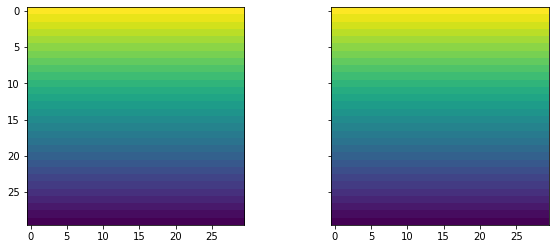

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(SS[i])
ax2.imshow(SSt[i])

dt as per the given equation is 1 (since dx, dy and k are 1). When increasing the timestep manually, even by a small bit, it seems my solution to find the steady state iteration no longer works as there are small fluctuations on the scale of 1e-13 around where the iteration would definitely be in steady state. When reducing the timestep, as I have done above, the iteration number increases. In the case above i halved the time to 0.5 which increased the steady state iteration number from 2783 to 5459, which is about double. For this reason it does indeed seem that the optimal time step size is that which is calculated from the given equation, which is 1 with the parametres used in this code.

<font color='brick'>
That's all well and good, but you have to show me! Also, I asked you to comment on whether the _optimal_ timestep size is somewhat close to:
    
$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$

Calculate `dt` using this formula and then compute the temperature solution. What happens if you increase or decrease `dt` by a small amount?

    
</font>